In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


In [ ]:
df = pd.read_csv('/content/twitter_sentiment.csv', header=None,
index_col=0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df = df[[2,3]].reset_index(drop=True)


In [ ]:
df.columns = ['sentiment', 'text']
df.head(3)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)
# df = df[df['text'].apply(len)]

In [ ]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len) <= 5)

(72883, 2113)

In [ ]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,22020
Positive,20186
Neutral,17899
Irrelevant,12778



# **Preprocessing preprocess_kgptalkie**

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install preprocess_kgptalkie
!pip install utils


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=58e847b1c68451394289b2debf98213a7f2eb7e41694e6d5790bdc3428035803
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Suc

In [ ]:
from googletrans import Translator
print("googletrans is installed and working!")


googletrans is installed and working!


In [ ]:
import preprocess_kgptalkie as ps
import utils
import pandas as pd


In [ ]:
def word_count(x):
    return len(str(x).split())

def char_count(x):
    return len(str(x))

def avg_word_len(x):
    words = str(x).split()
    return sum(len(word) for word in words) / len(words) if words else 0

def stop_words_count(x):
    stop_words = set(stopwords.words('english'))
    return len([word for word in str(x).split() if word.lower() in stop_words])

def hashtags_count(x):
    return len(re.findall(r'#\w+', str(x)))

def mentions_count(x):
    return len(re.findall(r'@\w+', str(x)))

def numerics_count(x):
    return len(re.findall(r'\d', str(x)))

def upper_case_count(x):
    return sum(1 for char in str(x) if char.isupper())


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # For word_tokenize, if needed

# Define the helper functions
def word_count(x):
    return len(str(x).split())

def char_count(x):
    return len(str(x))

def avg_word_len(x):
    words = str(x).split()
    return sum(len(word) for word in words) / len(words) if words else 0

def stop_words_count(x):
    stop_words = set(stopwords.words('english'))
    return len([word for word in str(x).split() if word.lower() in stop_words])

def hashtags_count(x):
    return len(re.findall(r'#\w+', str(x)))

def mentions_count(x):
    return len(re.findall(r'@\w+', str(x)))

def numerics_count(x):
    return len(re.findall(r'\d+', str(x)))

def upper_case_count(x):
    return sum(1 for char in str(x) if char.isupper())

# Updated extract_features function
def extract_features(x):
    return {
        'word_count': word_count(x),
        'char_count': char_count(x),
        'avg_word_len': avg_word_len(x),
        'stop_words_count': stop_words_count(x),
        'hashtags_count': hashtags_count(x),
        'mentions_count': mentions_count(x),
        'numerics_count': numerics_count(x),
        'upper_case_count': upper_case_count(x),
    }

# Assuming df is your DataFrame and has a 'text' column
# Apply features to the DataFrame
df['features'] = df['text'].apply(extract_features)

# Convert the extracted features to separate columns
features_df = pd.json_normalize(df['features'])
df = pd.concat([df, features_df], axis=1)

# Drop the 'features' column if it's no longer needed
df = df.drop(columns=['features'])

# Verify the output
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  sentiment                                               text  word_count  \
0  Positive  im getting on borderlands and i will murder yo...        11.0   
1  Positive  I am coming to the borders and I will kill you...        12.0   
2  Positive  im getting on borderlands and i will kill you ...        10.0   
3  Positive  im coming on borderlands and i will murder you...        10.0   
4  Positive  im getting on borderlands 2 and i will murder ...        12.0   

   char_count  avg_word_len  stop_words_count  hashtags_count  mentions_count  \
0        53.0      3.909091               6.0             0.0             0.0   
1        51.0      3.333333               8.0             0.0             0.0   
2        50.0      4.100000               5.0             0.0             0.0   
3        51.0      4.200000               5.0             0.0             0.0   
4        57.0      3.833333               6.0             0.0             0.0   

   numerics_count  upper_case_count  
0     

In [ ]:

print(df.info())  # Show the structure and data types


<class 'pandas.core.frame.DataFrame'>
Index: 75601 entries, 0 to 72882
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentiment         72883 non-null  object 
 1   text              72883 non-null  object 
 2   word_count        72883 non-null  float64
 3   char_count        72883 non-null  float64
 4   avg_word_len      72883 non-null  float64
 5   stop_words_count  72883 non-null  float64
 6   hashtags_count    72883 non-null  float64
 7   mentions_count    72883 non-null  float64
 8   numerics_count    72883 non-null  float64
 9   upper_case_count  72883 non-null  float64
dtypes: float64(8), object(2)
memory usage: 6.3+ MB
None


In [ ]:
num_cols = df.select_dtypes(include='number').columns
print("Numeric Columns:", num_cols)


Numeric Columns: Index(['word_count', 'char_count', 'avg_word_len', 'stop_words_count',
       'hashtags_count', 'mentions_count', 'numerics_count',
       'upper_case_count'],
      dtype='object')


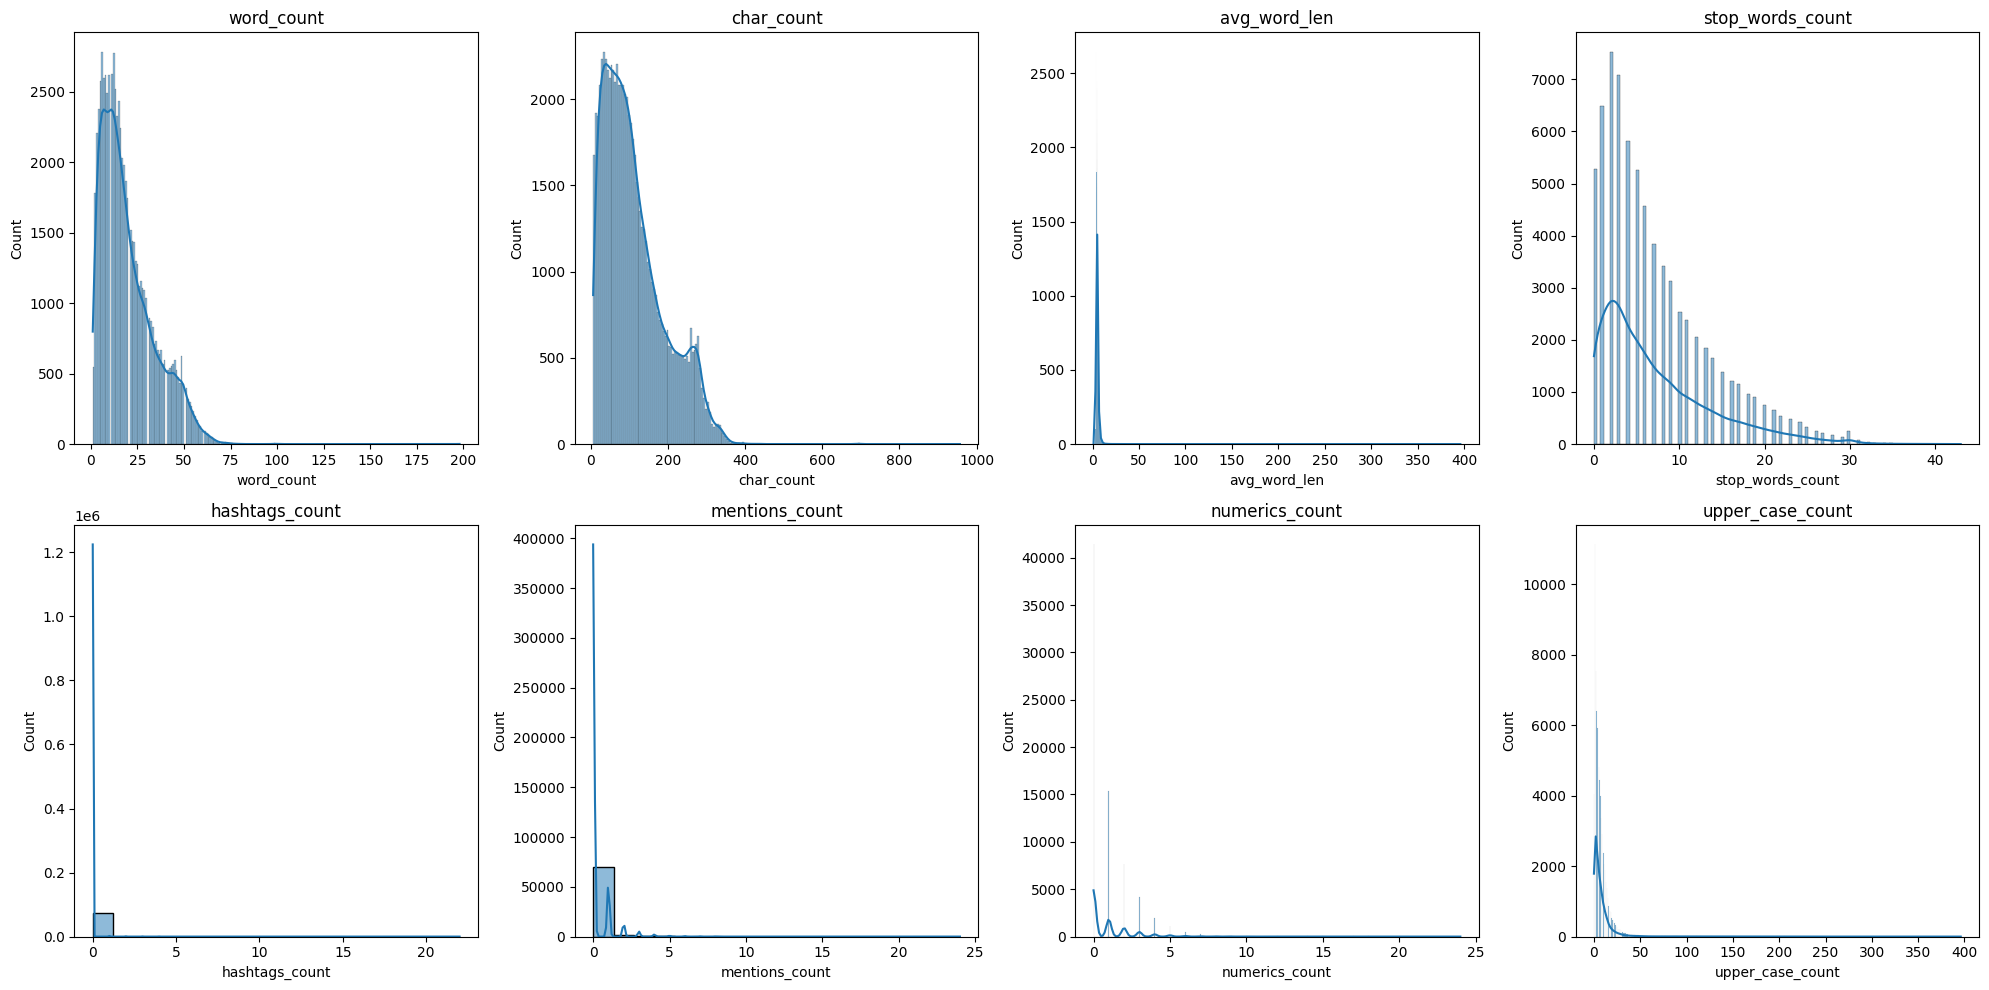

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
num_cols = df.select_dtypes(include='number').columns[:8]  # Limit to first 8 numeric columns
for index, col in enumerate(num_cols):
    plt.subplot(2, 4, index + 1)
    sns.histplot(df[col], kde=True)  # Example plot; replace with desired plot type
    plt.title(col)
plt.tight_layout()
plt.show()


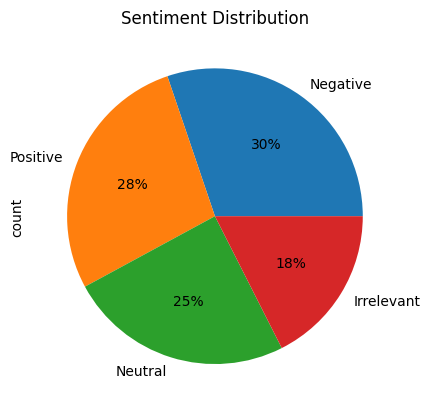

In [ ]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


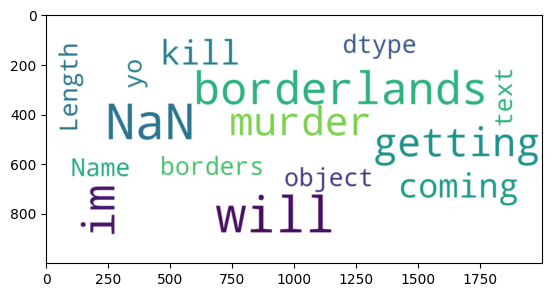

In [ ]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud, interpolation='bilinear')

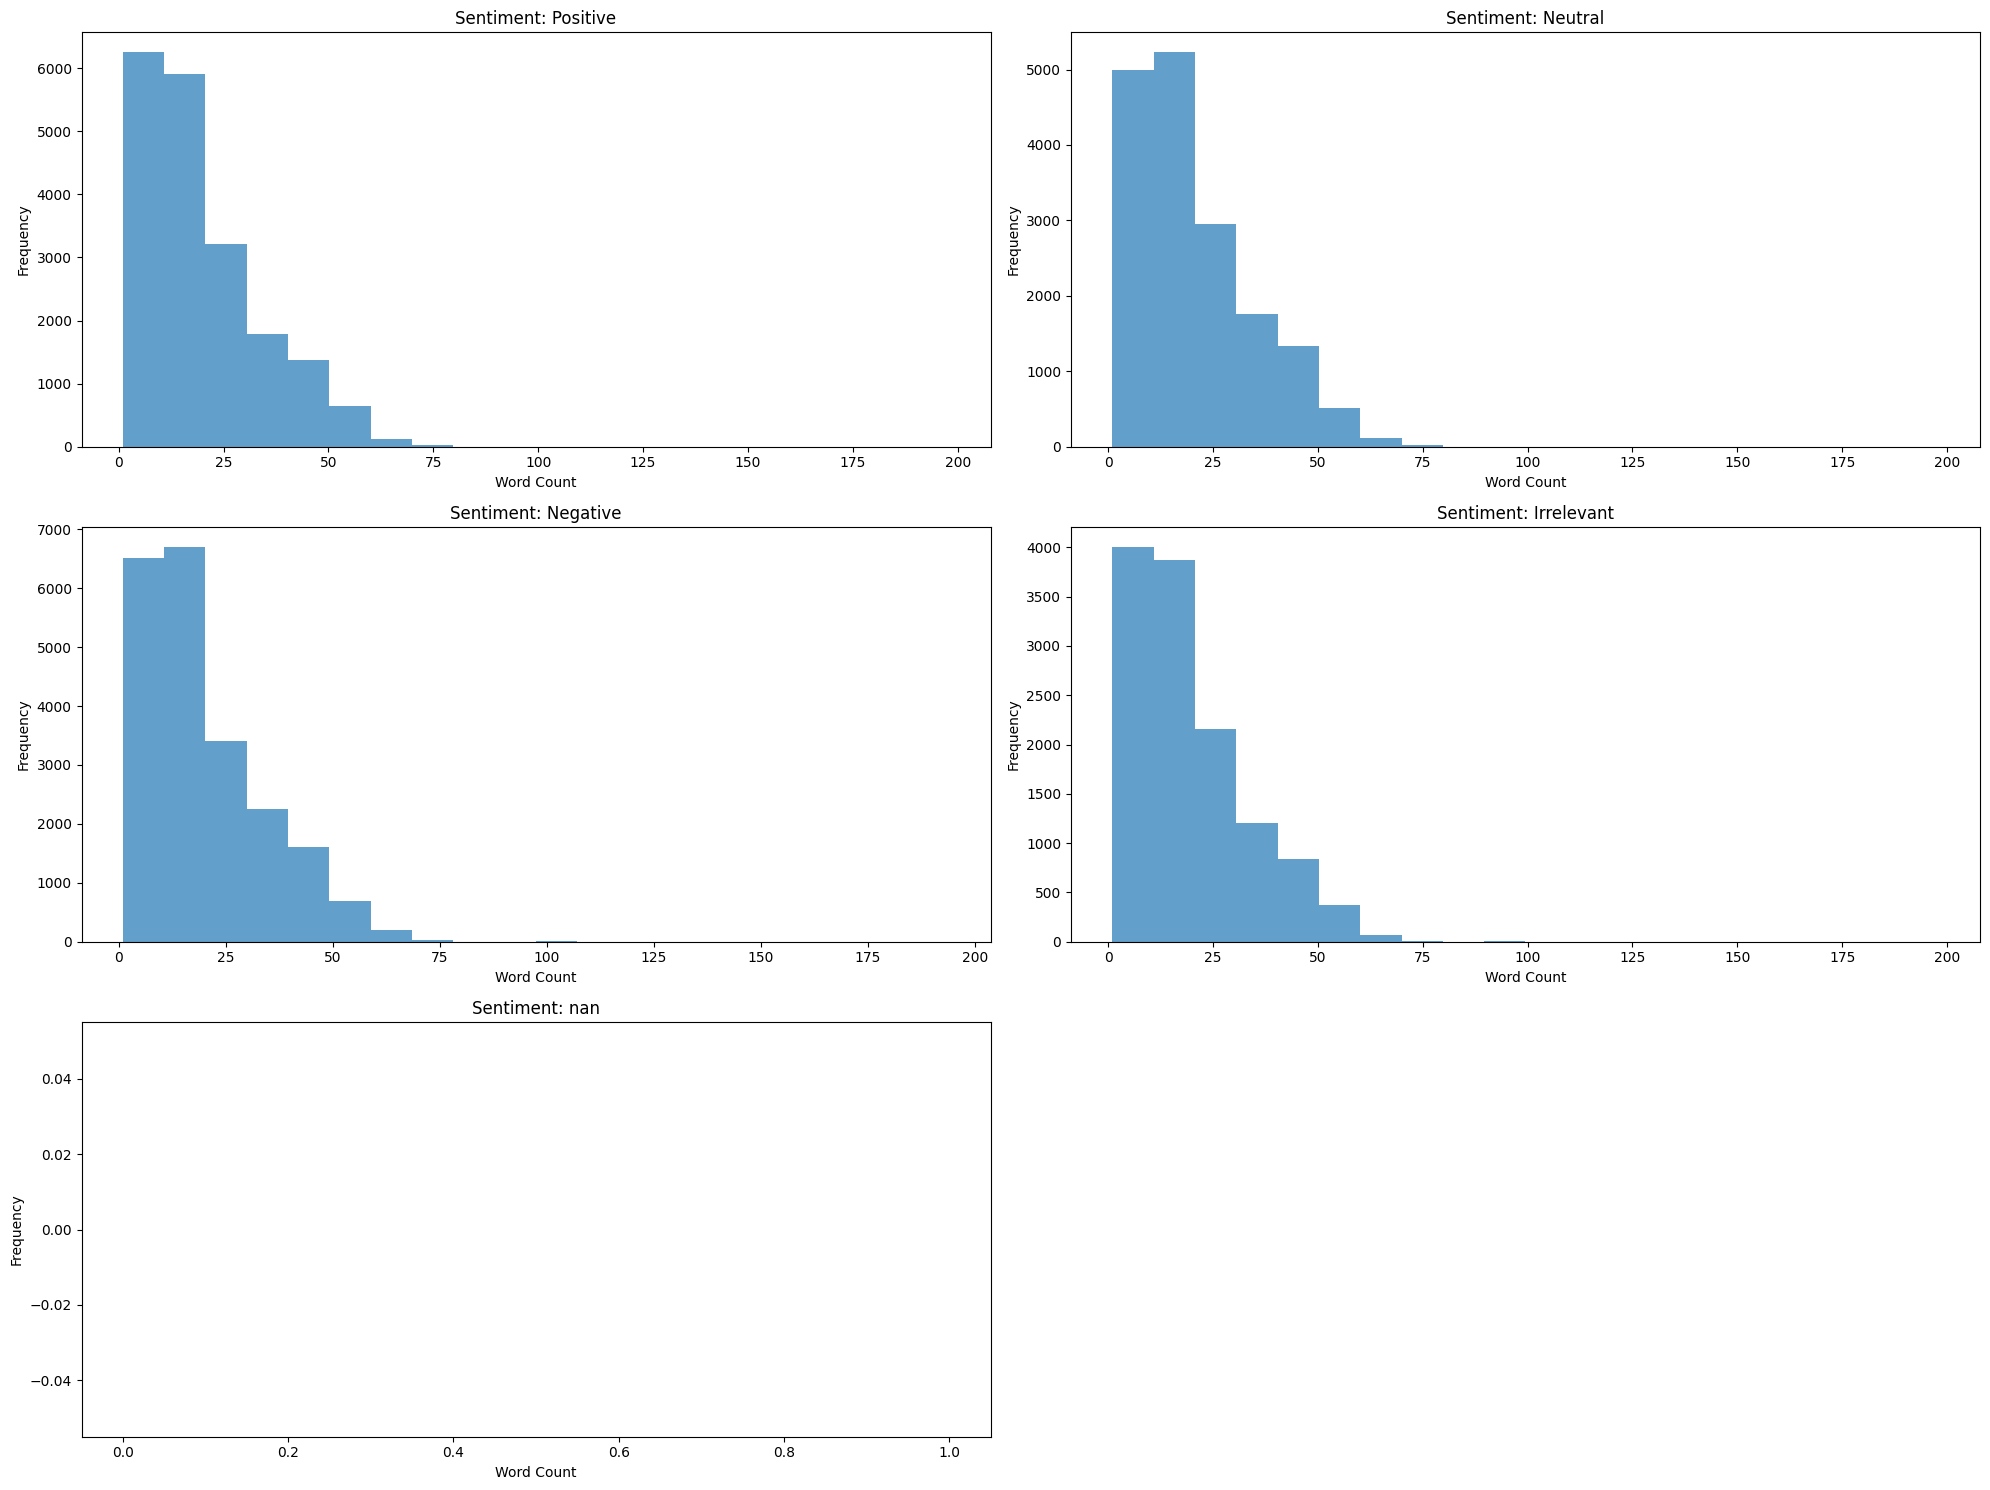

In [ ]:
import math

# Calculate the number of rows and columns dynamically
unique_sentiments = df['sentiment'].unique()
num_sentiments = len(unique_sentiments)
rows = math.ceil(num_sentiments / 2)  # Adjust rows dynamically based on the number of sentiments

plt.figure(figsize=(20, rows * 5))  # Dynamically adjust figure height
for index, sent in enumerate(unique_sentiments, start=1):
    plt.subplot(rows, 2, index)  # Dynamically adjust rows and columns
    sentiment_data = df[df['sentiment'] == sent]  # Filter data for the current sentiment
    plt.title(f"Sentiment: {sent}")  # Add title for each plot
    plt.hist(sentiment_data['word_count'], bins=20, alpha=0.7)  # Example plot: Histogram of word counts
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


**Data Cleaning**

In [82]:
import pandas as pd
import preprocess_kgptalkie as ps

# Ensure all entries are strings, replacing NaN or other types with empty strings
df['text'] = df['text'].fillna('').astype(str)

In [83]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))


In [85]:
# Replace NaN in 'text' with empty strings
df['text'] = df['text'].fillna('')

# Check for and remove NaNs in 'sentiment'
df = df[df['sentiment'].notnull()]


In [84]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['sentiment'], test_size=0.2, random_state=0
)

# Check for NaN values after splitting
X_train = X_train.fillna('')
y_train = y_train.dropna()

X_test = X_test.fillna('')
y_test = y_test.dropna()

X_train.shape, X_test.shape


((58306,), (14577,))

**MODEL BUILDING**

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline





In [96]:
from nltk.corpus import stopwords

# Make sure stopwords are downloaded
import nltk
nltk.download('stopwords')

stopwords_list = stopwords.words('english')

clf = Pipeline([
    ('tfid', TfidfVectorizer(stop_words=stopwords_list)),  # Use a list of stopwords
    ('rfc', RandomForestClassifier(n_jobs=-1))
])

# Fit the model
clf.fit(X_train, y_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [97]:
from sklearn.metrics import classification_report

In [98]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.85      0.91      2561
    Negative       0.91      0.95      0.93      4481
     Neutral       0.92      0.91      0.91      3553
    Positive       0.90      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.91      0.92     14577
weighted avg       0.92      0.92      0.92     14577



## test on all 4 Types with example of each one

In [101]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

In [103]:
clf.predict(["let me not upset you"])

array(['Negative'], dtype=object)

In [104]:
clf.predict(["I'm really glad to see you"])

array(['Positive'], dtype=object)

In [105]:
clf.predict(["I hate you"])

array(['Irrelevant'], dtype=object)

In [107]:
clf.predict(["I have done nothing but play boreland"])

array(['Positive'], dtype=object)